# AM 115: Mathematical Modeling
### Final Project: Shirley Wang

#### Aim 1: Formalize individual-level theory 

<img src="images/mod1.png" style="width: 600px;">

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def mod1(t, y_vec, a1, a2, b1, b2, c1, c2, d1, e1, k):
    
    '''
    vars:
        S: stressor; y_vec[0] and y_vec[1]
        N: negative affect; y_vec[2]
        E: escape urge; y_vec[3]
        O: other escape bx; y_vec[4]
        T: suicidal thoughts; y_vec[5]
        L: long-term change; y_vec[6]

    args:
        a1: self-perpetuating stressor --> stressor 
        a2: effect of stressor --> NA 
        b1: self-perpetuating NA --> NA
        b2: effect of NA --> escape urge
        b3: effect of NA --> long-term change
        c1: effect of escape urge --> other escape bx
        c2: effect of escape urge --> suicidal thoughts
        d1: effect of other escape bx --> NA
        e1: effect of long-term change --> stressor
        k : carrying capacity 
    '''
    # variables
    S = y_vec[0]
    N = y_vec[1]
    E = y_vec[2]
    O = y_vec[3]
    T = y_vec[4]
    L = y_vec[5]
    
    # derivatives
    dS = a1*S*(1 - S/k) - e1*L
    dN = a2*S*(1 - N/k) - d1*O*(1 - N/k)
    dE = b1*N*(1 - E/k) - b2*N*(1 - L/k)*.9
    dO = c1*E*(1 - O/k) - c2*E*(1 - T/k)*.9
    dT = c2*E*(1 - T/k) - c1*E*(1 - O/k)*.9
    dL = b2*N*(1 - L/k) - b1*N*(1 - E/k)*.9
    
    return(dS, dN, dE, dO, dT, dL)

## Sensitivity to Initial Conditions

In [4]:
# zero start
y_vec = np.array([0, 0, 0, 0, 0, 0])

# parameters
a1 = 0.02
a2 = 0.02
b1 = 0.03
b2 = 0.02
c1 = 0.03
c2 = 0.02
d1 = 0.05
e1 = 0.01
k = 10

# integrate
sol_zero = solve_ivp(mod1, [0, 365], y_vec, args = (a1, a2, b1, b2, c1, c2, d1, e1, k), method = "Radau")

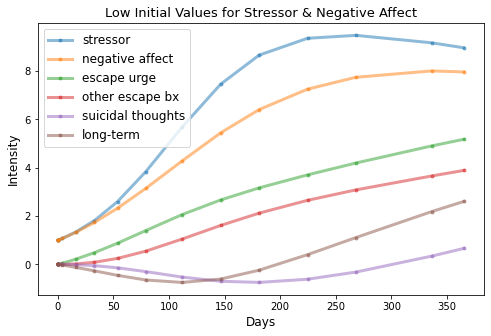

In [5]:
# low Stress, NA
y_vec = np.array([1, 1, 0, 0, 0, 0])

# parameters
a1 = 0.02
a2 = 0.02
b1 = 0.03
b2 = 0.02
c1 = 0.03
c2 = 0.02
d1 = 0.05
e1 = 0.01
k = 10

# integrate
sol_low = solve_ivp(mod1, [0, 365], y_vec, args = (a1, a2, b1, b2, c1, c2, d1, e1, k), method = "Radau")

# plot
plt.figure(figsize=(8, 5))
plt.plot(sol_low.t, sol_low.y[0, :], '.-', label = 'stressor', linewidth = 3, alpha = 0.5)
plt.plot(sol_low.t, sol_low.y[1, :], '.-', label = 'negative affect', linewidth = 3, alpha = 0.5)
plt.plot(sol_low.t, sol_low.y[2, :], '.-', label = 'escape urge', linewidth = 3, alpha = 0.5)
plt.plot(sol_low.t, sol_low.y[3, :], '.-', label = 'other escape bx', linewidth = 3, alpha = 0.5)
plt.plot(sol_low.t, sol_low.y[4, :], '.-', label = 'suicidal thoughts', linewidth = 3, alpha = 0.5)
plt.plot(sol_low.t, sol_low.y[5, :], '.-', label = 'long-term', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 12)
plt.title('Low Initial Values for Stressor & Negative Affect', fontsize = 13)
plt.ylabel('Intensity', fontsize = 12)
plt.xlabel('Days', fontsize = 12)
plt.savefig("images/low_initial_conditions.png", dpi = 300);

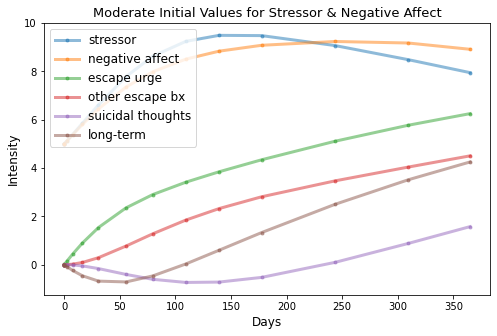

In [6]:
# medium stress + medium NA conditions
y_vec = np.array([5, 5, 0, 0, 0, 0])

# parameters
a1 = 0.02
a2 = 0.02
b1 = 0.03
b2 = 0.02
c1 = 0.03
c2 = 0.02
d1 = 0.05
e1 = 0.01
k = 10

# integrate
sol_med = solve_ivp(mod1, [0, 365], y_vec, args = (a1, a2, b1, b2, c1, c2, d1, e1, k), method = "Radau")

# plot
plt.figure(figsize=(8, 5))
plt.plot(sol_med.t, sol_med.y[0, :], '.-', label = 'stressor', linewidth = 3, alpha = 0.5)
plt.plot(sol_med.t, sol_med.y[1, :], '.-', label = 'negative affect', linewidth = 3, alpha = 0.5)
plt.plot(sol_med.t, sol_med.y[2, :], '.-', label = 'escape urge', linewidth = 3, alpha = 0.5)
plt.plot(sol_med.t, sol_med.y[3, :], '.-', label = 'other escape bx', linewidth = 3, alpha = 0.5)
plt.plot(sol_med.t, sol_med.y[4, :], '.-', label = 'suicidal thoughts', linewidth = 3, alpha = 0.5)
plt.plot(sol_med.t, sol_med.y[5, :], '.-', label = 'long-term', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 12)
plt.title('Moderate Initial Values for Stressor & Negative Affect', fontsize = 13)
plt.ylabel('Intensity', fontsize = 12)
plt.xlabel('Days', fontsize = 12)
plt.savefig("images/mod_initial_conditions.png", dpi = 300);

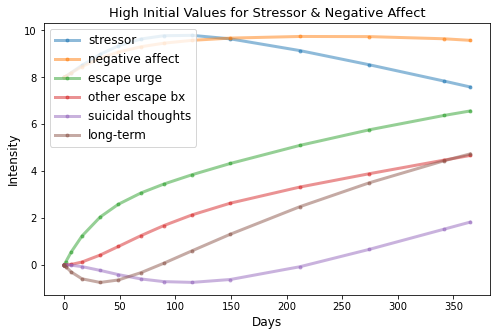

In [7]:
# high stress + high NA conditions
y_vec = np.array([8, 8, 0, 0, 0, 0])

# parameters
a1 = 0.02
a2 = 0.02
b1 = 0.03
b2 = 0.02
c1 = 0.03
c2 = 0.02
d1 = 0.05
e1 = 0.01
k = 10

# integrate
sol_high = solve_ivp(mod1, [0, 365], y_vec, args = (a1, a2, b1, b2, c1, c2, d1, e1, k), method = "Radau")

# plot
plt.figure(figsize=(8, 5))
plt.plot(sol_high.t, sol_high.y[0, :], '.-', label = 'stressor', linewidth = 3, alpha = 0.5)
plt.plot(sol_high.t, sol_high.y[1, :], '.-', label = 'negative affect', linewidth = 3, alpha = 0.5)
plt.plot(sol_high.t, sol_high.y[2, :], '.-', label = 'escape urge', linewidth = 3, alpha = 0.5)
plt.plot(sol_high.t, sol_high.y[3, :], '.-', label = 'other escape bx', linewidth = 3, alpha = 0.5)
plt.plot(sol_high.t, sol_high.y[4, :], '.-', label = 'suicidal thoughts', linewidth = 3, alpha = 0.5)
plt.plot(sol_high.t, sol_high.y[5, :], '.-', label = 'long-term', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 12)
plt.title('High Initial Values for Stressor & Negative Affect', fontsize = 13)
plt.ylabel('Intensity', fontsize = 12)
plt.xlabel('Days', fontsize = 12)
plt.savefig("images/high_initial_conditions.png", dpi = 300);

### Plotting each variable over time by varying initial conditions

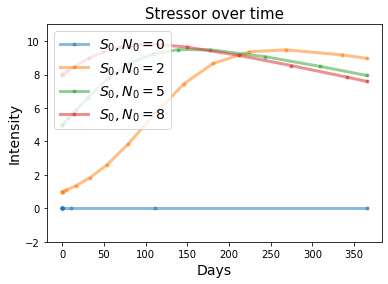

In [8]:
# stressor
plt.plot(sol_zero.t, sol_zero.y[0, :], '.-', label = f'$S_0, N_0 = 0$', linewidth = 3, alpha = 0.5)
plt.plot(sol_low.t, sol_low.y[0, :], '.-', label = f'$S_0, N_0 = 2$', linewidth = 3, alpha = 0.5)
plt.plot(sol_med.t, sol_med.y[0, :], '.-', label = f'$S_0, N_0 = 5$', linewidth = 3, alpha = 0.5)
plt.plot(sol_high.t, sol_high.y[0, :], '.-', label = f'$S_0, N_0 = 8$', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 14)
plt.title('Stressor over time', fontsize = 15)
plt.ylabel('Intensity', fontsize = 14)
plt.xlabel('Days', fontsize = 14)
plt.ylim([-2, 11])
plt.savefig("images/stressor_initial.png", dpi = 300);

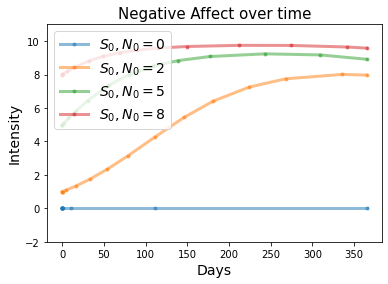

In [9]:
# negative affect
plt.plot(sol_zero.t, sol_zero.y[1, :], '.-', label = f'$S_0, N_0 = 0$', linewidth = 3, alpha = 0.5)
plt.plot(sol_low.t, sol_low.y[1, :], '.-', label = f'$S_0, N_0 = 2$', linewidth = 3, alpha = 0.5)
plt.plot(sol_med.t, sol_med.y[1, :], '.-', label = f'$S_0, N_0 = 5$', linewidth = 3, alpha = 0.5)
plt.plot(sol_high.t, sol_high.y[1, :], '.-', label = f'$S_0, N_0 = 8$', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 14)
plt.title('Negative Affect over time', fontsize = 15)
plt.ylabel('Intensity', fontsize = 14)
plt.xlabel('Days', fontsize = 14)
plt.ylim([-2, 11])
plt.savefig("images/NA_initial.png", dpi = 300);

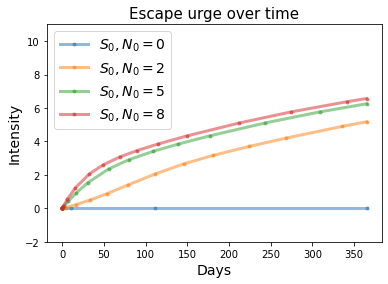

In [10]:
# escape urge
plt.plot(sol_zero.t, sol_zero.y[2, :], '.-', label = f'$S_0, N_0 = 0$', linewidth = 3, alpha = 0.5)
plt.plot(sol_low.t, sol_low.y[2, :], '.-', label = f'$S_0, N_0 = 2$', linewidth = 3, alpha = 0.5)
plt.plot(sol_med.t, sol_med.y[2, :], '.-', label = f'$S_0, N_0 = 5$', linewidth = 3, alpha = 0.5)
plt.plot(sol_high.t, sol_high.y[2, :], '.-', label = f'$S_0, N_0 = 8$', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 14)
plt.title('Escape urge over time', fontsize = 15)
plt.ylabel('Intensity', fontsize = 14)
plt.xlabel('Days', fontsize = 14)
plt.ylim([-2, 11])
plt.savefig("images/escapeurge_initial.png", dpi = 300);

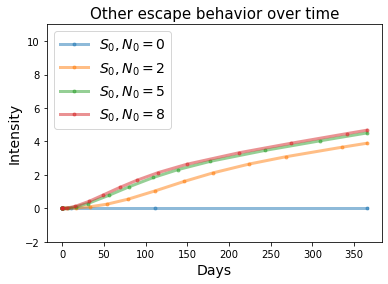

In [11]:
# other escape strategy
plt.plot(sol_zero.t, sol_zero.y[3, :], '.-', label = f'$S_0, N_0 = 0$', linewidth = 3, alpha = 0.5)
plt.plot(sol_low.t, sol_low.y[3, :], '.-', label = f'$S_0, N_0 = 2$', linewidth = 3, alpha = 0.5)
plt.plot(sol_med.t, sol_med.y[3, :], '.-', label = f'$S_0, N_0 = 5$', linewidth = 3, alpha = 0.5)
plt.plot(sol_high.t, sol_high.y[3, :], '.-', label = f'$S_0, N_0 = 8$', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 14)
plt.title('Other escape behavior over time', fontsize = 15)
plt.ylabel('Intensity', fontsize = 14)
plt.xlabel('Days', fontsize = 14)
plt.ylim([-2, 11])
plt.savefig("images/otherbx_initial.png", dpi = 300);

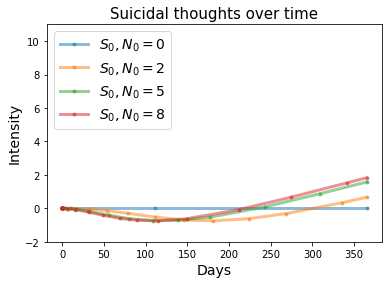

In [12]:
# suicidal thoughts
plt.plot(sol_zero.t, sol_zero.y[4, :], '.-', label = f'$S_0, N_0 = 0$', linewidth = 3, alpha = 0.5)
plt.plot(sol_low.t, sol_low.y[4, :], '.-', label = f'$S_0, N_0 = 2$', linewidth = 3, alpha = 0.5)
plt.plot(sol_med.t, sol_med.y[4, :], '.-', label = f'$S_0, N_0 = 5$', linewidth = 3, alpha = 0.5)
plt.plot(sol_high.t, sol_high.y[4, :], '.-', label = f'$S_0, N_0 = 8$', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 14)
plt.title('Suicidal thoughts over time', fontsize = 15)
plt.ylabel('Intensity', fontsize = 14)
plt.xlabel('Days', fontsize = 14)
plt.ylim([-2, 11])
plt.savefig("images/suicide_initial.png", dpi = 300);

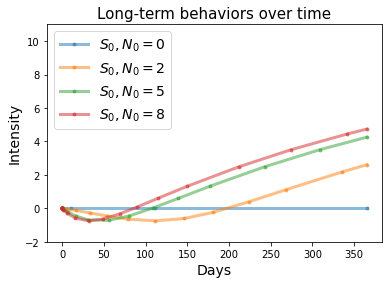

In [13]:
# long-term change
plt.plot(sol_zero.t, sol_zero.y[5, :], '.-', label = f'$S_0, N_0 = 0$', linewidth = 3, alpha = 0.5)
plt.plot(sol_low.t, sol_low.y[5, :], '.-', label = f'$S_0, N_0 = 2$', linewidth = 3, alpha = 0.5)
plt.plot(sol_med.t, sol_med.y[5, :], '.-', label = f'$S_0, N_0 = 5$', linewidth = 3, alpha = 0.5)
plt.plot(sol_high.t, sol_high.y[5, :], '.-', label = f'$S_0, N_0 = 8$', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 14)
plt.title('Long-term behaviors over time', fontsize = 15)
plt.ylabel('Intensity', fontsize = 14)
plt.xlabel('Days', fontsize = 14)
plt.ylim([-2, 11])
plt.savefig("images/longterm_initial.png", dpi = 300);

## Parameter Sensitivity

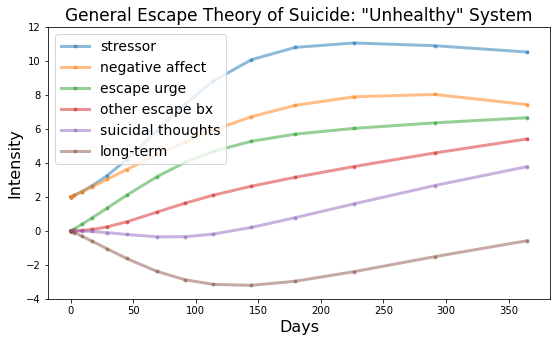

In [22]:
# medium starting values
y_vec = np.array([2, 2, 0, 0, 0, 0])

#ORIGINAL
#a1 = 0.02
#a2 = 0.02
#b1 = 0.03
#b2 = 0.02
#c1 = 0.03
#c2 = 0.02
#d1 = 0.05
#e1 = 0.01
#k = 10

# parameters: "unhealthy" (b1 > b2, c1 > c2)
a1 = 0.02
a2 = 0.02
b1 = 0.03
b2 = 0.01
c1 = 0.04
c2 = 0.03
d1 = 0.05
e1 = 0.01
k = 10

# integrate
sol_mod1 = solve_ivp(mod1, [0, 365], y_vec, args = (a1, a2, b1, b2, c1, c2, d1, e1, k), method = "Radau")

# plot
plt.figure(figsize=(9, 5))
plt.plot(sol_mod1.t, sol_mod1.y[0, :], '.-', label = 'stressor', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[1, :], '.-', label = 'negative affect', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[2, :], '.-', label = 'escape urge', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[3, :], '.-', label = 'other escape bx', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[4, :], '.-', label = 'suicidal thoughts', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[5, :], '.-', label = 'long-term', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 14)
plt.title('General Escape Theory of Suicide: "Unhealthy" System', fontsize = 17)
plt.ylabel('Intensity', fontsize = 16)
plt.xlabel('Days', fontsize = 16)
plt.ylim([-4, 12])
plt.savefig("images/unhealthy_params.png", dpi = 300);

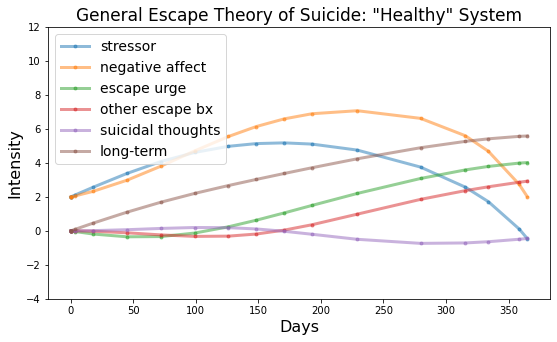

In [26]:
# medium starting values
y_vec = np.array([2, 2, 0, 0, 0, 0])

# parameters: "healthy" (b2 > b1, weak c1 + c2, low a2)
a1 = 0.02
a2 = 0.01
b1 = 0.03
b2 = 0.04
c1 = 0.03
c2 = 0.02
d1 = 0.05
e1 = 0.015
k = 10


#ORIGINAL
#a1 = 0.02
#a2 = 0.02
#b1 = 0.03
#b2 = 0.02
#c1 = 0.03
#c2 = 0.02
#d1 = 0.05
#e1 = 0.01
#k = 10

# integrate
sol_mod1 = solve_ivp(mod1, [0, 365], y_vec, args = (a1, a2, b1, b2, c1, c2, d1, e1, k), method = "Radau")

# plot
plt.figure(figsize=(9, 5))
plt.plot(sol_mod1.t, sol_mod1.y[0, :], '.-', label = 'stressor', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[1, :], '.-', label = 'negative affect', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[2, :], '.-', label = 'escape urge', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[3, :], '.-', label = 'other escape bx', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[4, :], '.-', label = 'suicidal thoughts', linewidth = 3, alpha = 0.5)
plt.plot(sol_mod1.t, sol_mod1.y[5, :], '.-', label = 'long-term', linewidth = 3, alpha = 0.5)
plt.legend(loc = 'upper left', fontsize = 14)
plt.title('General Escape Theory of Suicide: "Healthy" System', fontsize = 17)
plt.ylabel('Intensity', fontsize = 16)
plt.xlabel('Days', fontsize = 16)
plt.ylim([-4, 12])
plt.savefig("images/healthy_params.png", dpi = 300);